In [1]:
import pandas as pd
import statsmodels.formula.api as sm


In [2]:
import matplotlib.pyplot as plt

In [3]:
airq_asthma_df = pd.read_csv('data/airq_FNOS_asthma.csv')

In [4]:
airq_asthma_df.head()


,year,borough,geo_place_name,mean_fpm,mean_no,ozone mean (ppb),mean_so2,ed_annual_adult_rate_per10k
0,2011,brooklyn,greenpoint,11.51,25.84,31.6,1.95,65.4
1,2013,staten island,south beach - tottenville,7.82,11.51,32.7,0.73,33.9
2,2014,staten island,south beach - tottenville,8.20,12.59,32.0,0.22,32.4
3,2009,staten island,south beach - tottenville,9.63,14.71,27.8,1.01,36.6
4,2012,staten island,south beach - tottenville,8.28,12.47,35.3,0.39,44.9


In [5]:
airq_asthma_df = airq_asthma_df.rename({'ozone mean (ppb)': 'mean_ozone'}, axis = 1)

## checking linear regression requirements

In this section, I explore the data to see if the requirements for linear regression are met. 
The requirements are : 
1 - The outcome variable has a linear relationship with the input variable. This can be visualized with a scatter plot.
2 - The data for each variable is normally distributed. I used qq plots to check for normal distribution of each variable
3 - None of the variables are linearly related to any other variable. I used scatter plots to visualize the relationship among all variables.
4 - Each observation is independent of other observations. 
5 - The data does not demonstrate Heterskedasicity. I also used a scatterplot to visualize this, and there is some apparent heteroskedasicity.

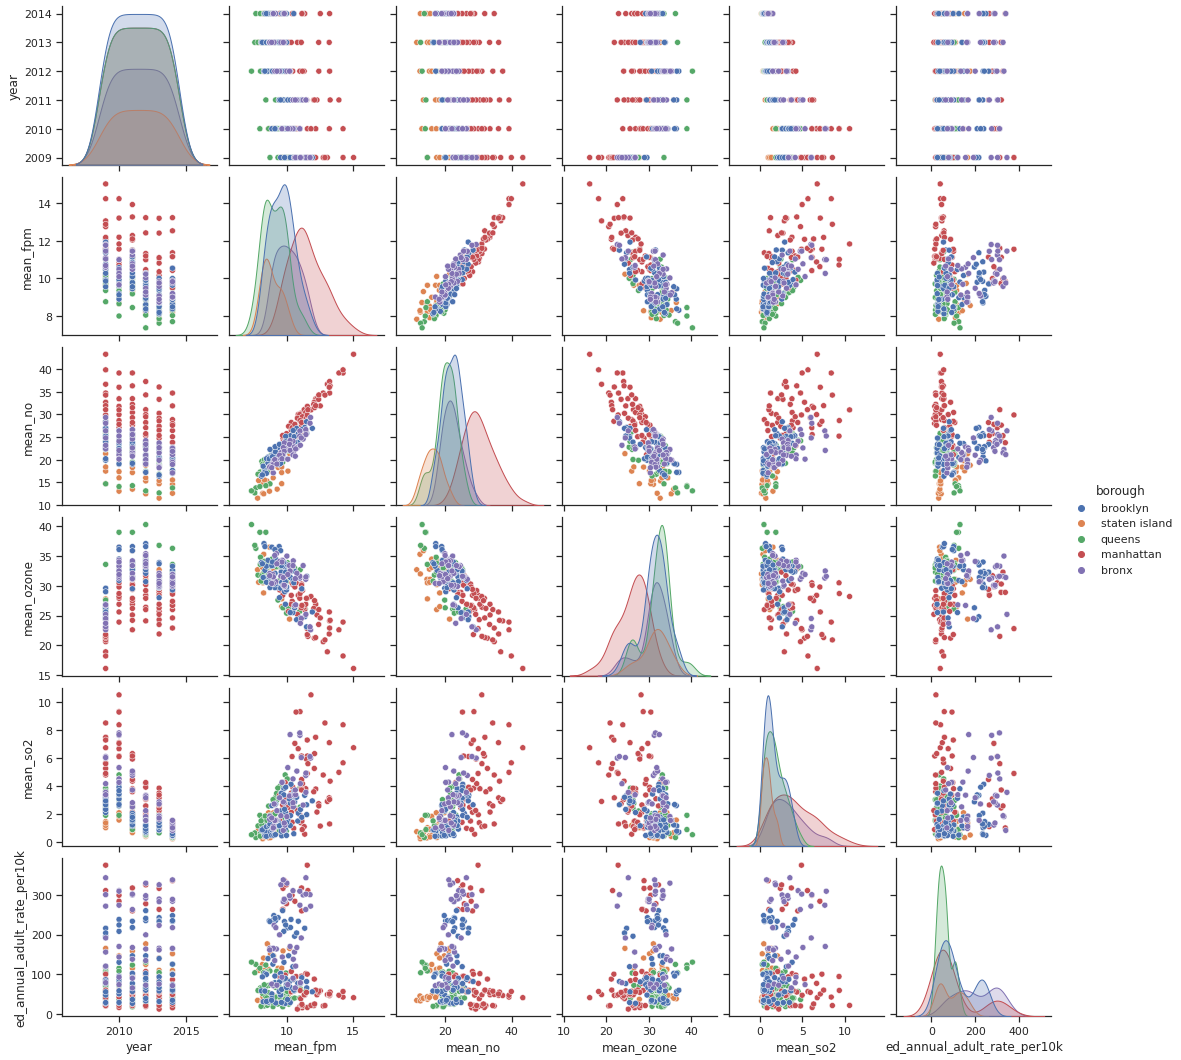

In [6]:
import seaborn as sns
sns.set_theme(style="ticks")

airq_asthma_plots = sns.pairplot(airq_asthma_df, hue="borough")

We can see that mean_fpm and mean_no are strongly correlated, so only one of them should be included in the model. The predictor variables do not seem to be linearly related to the outcome variables, but there does appear to be some patterns with some of the borough so I will continue with the investigation.

#### Checking for normal distribution

In [7]:
from scipy import stats
import statsmodels.formula.api as smf

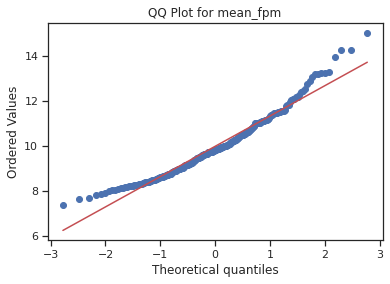

In [8]:
stats.probplot(x=airq_asthma_df['mean_fpm'], dist="norm", plot=plt)
plt.title("QQ Plot for mean_fpm")
plt.show()

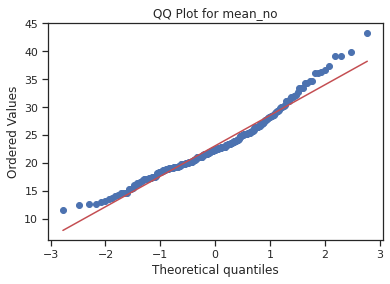

In [9]:
stats.probplot(x=airq_asthma_df['mean_no'], dist="norm", plot=plt)
plt.title("QQ Plot for mean_no")
plt.show()

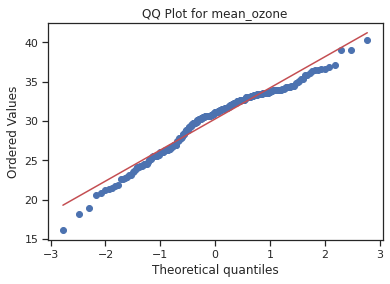

In [10]:
stats.probplot(x=airq_asthma_df['mean_ozone'], dist="norm", plot=plt)
plt.title("QQ Plot for mean_ozone")
plt.show()

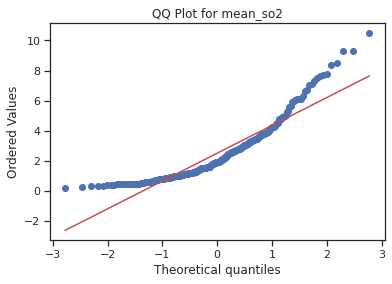

In [11]:
stats.probplot(x=airq_asthma_df['mean_so2'], dist="norm", plot=plt)
plt.title("QQ Plot for mean_so2")
plt.show()

From the qq plots, we can see that mean_fpm, mean_no and mean_ozone appear to be slightly off from a normal distribution. The qq plot for sulfur appears to be right skewed and I will transform it using a log transformation to fix this.

## standardizing variables

In this section I standardized the variables to get them all on the same scale.

In [12]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [13]:
airq_asthma_df.dtypes

year                             int64
borough                         object
geo_place_name                  object
mean_fpm                       float64
mean_no                        float64
mean_ozone                     float64
mean_so2                       float64
ed_annual_adult_rate_per10k    float64
dtype: object

In [14]:
airq_asthma_df.head()

,year,borough,geo_place_name,mean_fpm,mean_no,mean_ozone,mean_so2,ed_annual_adult_rate_per10k
0,2011,brooklyn,greenpoint,11.51,25.84,31.6,1.95,65.4
1,2013,staten island,south beach - tottenville,7.82,11.51,32.7,0.73,33.9
2,2014,staten island,south beach - tottenville,8.20,12.59,32.0,0.22,32.4
3,2009,staten island,south beach - tottenville,9.63,14.71,27.8,1.01,36.6
4,2012,staten island,south beach - tottenville,8.28,12.47,35.3,0.39,44.9


In [15]:
def standardization(dataset):
  """ Standardization of numeric fields, where all values will have mean of zero 
  and standard deviation of one. (z-score)

  Args:
    dataset: A `Pandas.Dataframe` 
  """
  dtypes = list(zip(dataset.dtypes.index, map(str, dataset.dtypes)))
  # Normalize numeric columns.
  for column, dtype in dtypes:
      if dtype == 'float64':
          dataset[column] -= dataset[column].mean()
          dataset[column] /= dataset[column].std()
  return dataset

In [16]:
airq_std = airq_asthma_df.copy() 

In [17]:
airq_std = standardization(airq_std)

In [18]:
airq_std.head()

,year,borough,geo_place_name,mean_fpm,mean_no,mean_ozone,mean_so2,ed_annual_adult_rate_per10k
0,2011,brooklyn,greenpoint,1.124020,0.500348,0.335129,-0.282888,-0.511043
1,2013,staten island,south beach - tottenville,-1.575301,-2.095570,0.610057,-0.901901,-0.859851
2,2014,staten island,south beach - tottenville,-1.297322,-1.899925,0.435103,-1.160668,-0.876460
3,2009,staten island,south beach - tottenville,-0.251243,-1.515881,-0.614619,-0.759832,-0.829953
4,2012,staten island,south beach - tottenville,-1.238800,-1.921663,1.259884,-1.074412,-0.738045


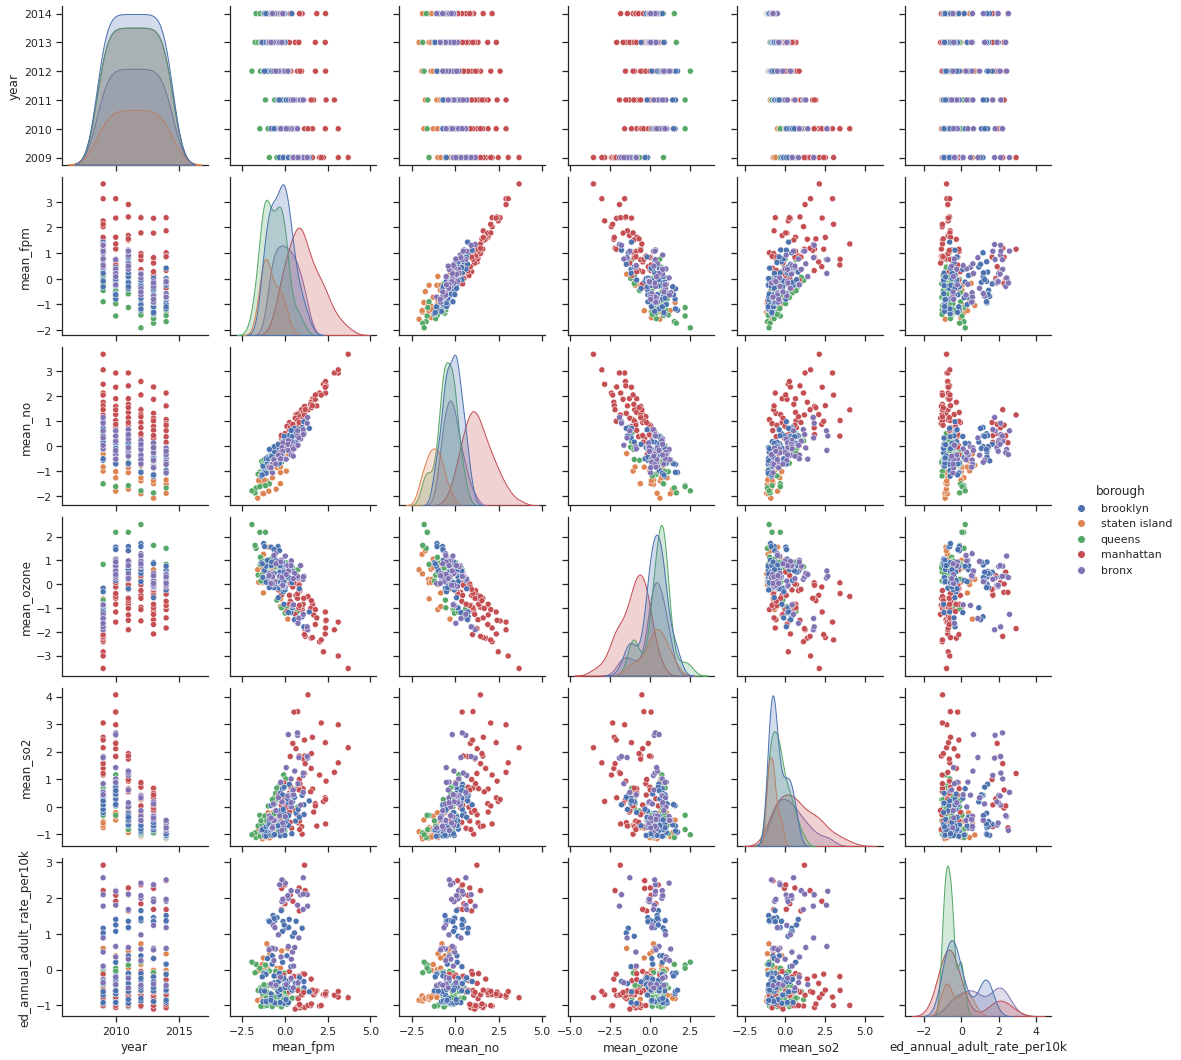

In [19]:
airq_asthma_plots_std = sns.pairplot(airq_std, hue="borough")

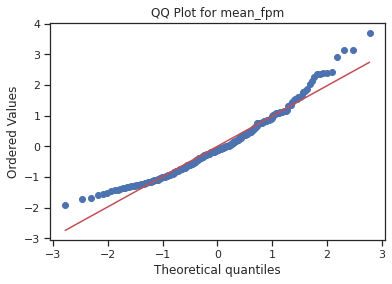

In [20]:
stats.probplot(x=airq_std['mean_fpm'], dist="norm", plot=plt)
plt.title("QQ Plot for mean_fpm")
plt.show()

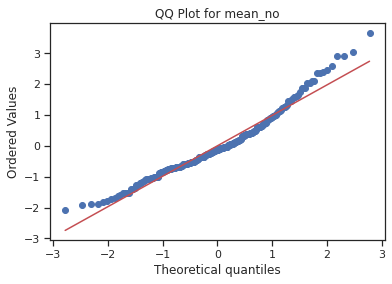

In [21]:
stats.probplot(x=airq_std['mean_no'], dist="norm", plot=plt)
plt.title("QQ Plot for mean_no")
plt.show()

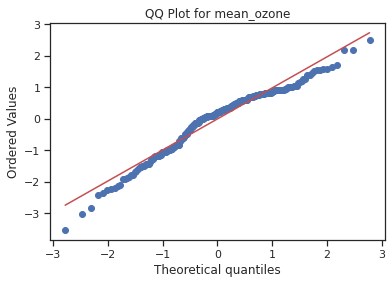

In [22]:
stats.probplot(x=airq_std['mean_ozone'], dist="norm", plot=plt)
plt.title("QQ Plot for mean_ozone")
plt.show()

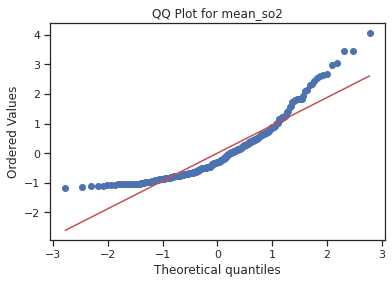

In [23]:
stats.probplot(x=airq_std['mean_so2'], dist="norm", plot=plt)
plt.title("QQ Plot for mean_so2")
plt.show()

In [24]:
import numpy as np

In [25]:
airq_asthma_df['log_so2']= np.log(airq_asthma_df['mean_so2'])

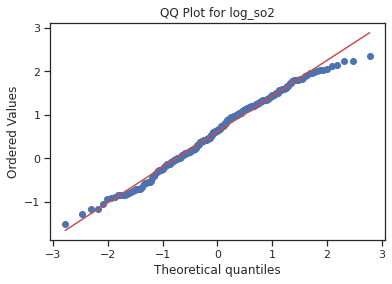

In [26]:
stats.probplot(x=airq_asthma_df['log_so2'], dist="norm", plot=plt)
plt.title("QQ Plot for log_so2")
plt.show()

The qq plot is closer to a normal distribution after the log transformation

## regression with std and log

In this section, I log transform and standardize the varibles.

In [27]:
airq_std_log = airq_asthma_df.copy()

In [28]:
airq_std_log['log_so2']= airq_asthma_df['log_so2']

In [29]:
airq_std_log.head()

,year,borough,geo_place_name,mean_fpm,mean_no,mean_ozone,mean_so2,ed_annual_adult_rate_per10k,log_so2
0,2011,brooklyn,greenpoint,11.51,25.84,31.6,1.95,65.4,0.667829
1,2013,staten island,south beach - tottenville,7.82,11.51,32.7,0.73,33.9,-0.314711
2,2014,staten island,south beach - tottenville,8.20,12.59,32.0,0.22,32.4,-1.514128
3,2009,staten island,south beach - tottenville,9.63,14.71,27.8,1.01,36.6,0.009950
4,2012,staten island,south beach - tottenville,8.28,12.47,35.3,0.39,44.9,-0.941609


In [30]:
airq_std_log['log_fpm']= np.log(airq_std_log['mean_fpm'])

In [31]:
airq_std_log.head()

,year,borough,geo_place_name,mean_fpm,mean_no,mean_ozone,mean_so2,ed_annual_adult_rate_per10k,log_so2,log_fpm
0,2011,brooklyn,greenpoint,11.51,25.84,31.6,1.95,65.4,0.667829,2.443216
1,2013,staten island,south beach - tottenville,7.82,11.51,32.7,0.73,33.9,-0.314711,2.056685
2,2014,staten island,south beach - tottenville,8.20,12.59,32.0,0.22,32.4,-1.514128,2.104134
3,2009,staten island,south beach - tottenville,9.63,14.71,27.8,1.01,36.6,0.009950,2.264883
4,2012,staten island,south beach - tottenville,8.28,12.47,35.3,0.39,44.9,-0.941609,2.113843


In [32]:
airq_std_log['log_no']= np.log(airq_std_log['mean_no'])
airq_std_log['log_ozone']= np.log(airq_std_log['mean_ozone'])

In [33]:
airq_std_log.head()

,year,borough,geo_place_name,mean_fpm,mean_no,mean_ozone,mean_so2,ed_annual_adult_rate_per10k,log_so2,log_fpm,log_no,log_ozone
0,2011,brooklyn,greenpoint,11.51,25.84,31.6,1.95,65.4,0.667829,2.443216,3.251924,3.453157
1,2013,staten island,south beach - tottenville,7.82,11.51,32.7,0.73,33.9,-0.314711,2.056685,2.443216,3.487375
2,2014,staten island,south beach - tottenville,8.20,12.59,32.0,0.22,32.4,-1.514128,2.104134,2.532903,3.465736
3,2009,staten island,south beach - tottenville,9.63,14.71,27.8,1.01,36.6,0.009950,2.264883,2.688528,3.325036
4,2012,staten island,south beach - tottenville,8.28,12.47,35.3,0.39,44.9,-0.941609,2.113843,2.523326,3.563883


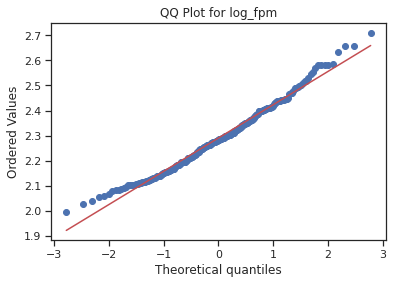

In [34]:
stats.probplot(x=airq_std_log['log_fpm'], dist="norm", plot=plt)
plt.title("QQ Plot for log_fpm")
plt.show()

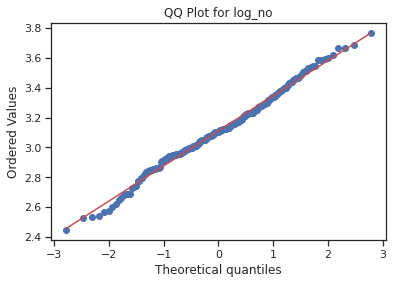

In [35]:
stats.probplot(x=airq_std_log['log_no'], dist="norm", plot=plt)
plt.title("QQ Plot for log_no")
plt.show()

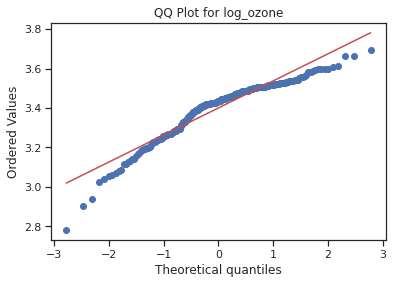

In [36]:
stats.probplot(x=airq_std_log['log_ozone'], dist="norm", plot=plt)
plt.title("QQ Plot for log_ozone")
plt.show()

### standardize log transformed variables

In [37]:
#first drop non_log columns
airq_std_log = airq_std_log[['year', 'borough', 'geo_place_name',
                                        'log_so2', 'log_fpm', 'log_no', 'log_ozone',
                                        'ed_annual_adult_rate_per10k']]

In [38]:
airq_std_log.head()

,year,borough,geo_place_name,log_so2,log_fpm,log_no,log_ozone,ed_annual_adult_rate_per10k
0,2011,brooklyn,greenpoint,0.667829,2.443216,3.251924,3.453157,65.4
1,2013,staten island,south beach - tottenville,-0.314711,2.056685,2.443216,3.487375,33.9
2,2014,staten island,south beach - tottenville,-1.514128,2.104134,2.532903,3.465736,32.4
3,2009,staten island,south beach - tottenville,0.009950,2.264883,2.688528,3.325036,36.6
4,2012,staten island,south beach - tottenville,-0.941609,2.113843,2.523326,3.563883,44.9


In [39]:
airq_std_log['log_asthma']= np.log(airq_std_log['ed_annual_adult_rate_per10k'])

In [40]:
airq_std_log.head()

,year,borough,geo_place_name,log_so2,log_fpm,log_no,log_ozone,ed_annual_adult_rate_per10k,log_asthma
0,2011,brooklyn,greenpoint,0.667829,2.443216,3.251924,3.453157,65.4,4.180522
1,2013,staten island,south beach - tottenville,-0.314711,2.056685,2.443216,3.487375,33.9,3.523415
2,2014,staten island,south beach - tottenville,-1.514128,2.104134,2.532903,3.465736,32.4,3.478158
3,2009,staten island,south beach - tottenville,0.009950,2.264883,2.688528,3.325036,36.6,3.600048
4,2012,staten island,south beach - tottenville,-0.941609,2.113843,2.523326,3.563883,44.9,3.804438


In [41]:
airq_std_log = standardization(airq_std_log)

In [42]:
airq_std_log.head()

,year,borough,geo_place_name,log_so2,log_fpm,log_no,log_ozone,ed_annual_adult_rate_per10k,log_asthma
0,2011,brooklyn,greenpoint,0.065785,1.147490,0.598309,0.372146,-0.511043,-0.267605
1,2013,staten island,south beach - tottenville,-1.140169,-1.766260,-2.843436,0.612793,-0.859851,-1.078416
2,2014,staten island,south beach - tottenville,-2.612315,-1.408575,-2.461742,0.460610,-0.876460,-1.134259
3,2009,staten island,south beach - tottenville,-0.741685,-0.196818,-1.799426,-0.528900,-0.829953,-0.983857
4,2012,staten island,south beach - tottenville,-1.909614,-1.335389,-2.502501,1.150856,-0.738045,-0.731659


## Regression models with log transformed and standardized variables 

### Best Model

This was the best model I created. It includes borough, log_ozone, log_no, and the interaction of ozone and nitrogen. The r squared is 0.3 and the AIC is down to 638. 

In [43]:
log_level_model9 = smf.ols(formula='ed_annual_adult_rate_per10k ~ log_ozone*log_no +log_ozone +log_no+ borough', data=airq_std_log).fit()
log_level_model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     ed_annual_adult_rate_per10k   R-squared:                       0.305
Model:                                     OLS   Adj. R-squared:                  0.285
Method:                          Least Squares   F-statistic:                     15.32
Date:                         Sun, 25 Jul 2021   Prob (F-statistic):           1.38e-16
Time:                                 17:07:47   Log-Likelihood:                -311.17
No. Observations:                          252   AIC:                             638.3
Df Residuals:                              244   BIC:                             666.6
Df Model:                                    7                                         
Covariance Type:                     nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    1.0666      0.132      8.087      0.000       0.807       1.326
borough[T.brooklyn]         -1.0350      0.167     -6.197      0.000      -1.364      -0.706
borough[T.manhattan]        -1.0501      0.210     -5.008      0.000      -1.463      -0.637
borough[T.queens]           -1.5917      0.174     -9.125      0.000      -1.935      -1.248
borough[T.staten island]    -1.0985      0.257     -4.272      0.000      -1.605      -0.592
log_ozone                    0.1303      0.090      1.441      0.151      -0.048       0.308
log_no                       0.1483      0.110      1.350      0.178      -0.068       0.365
log_ozone:log_no             0.0868      0.045      1.945      0.053      -0.001       0.175
==============================================================================
Omnibus:                       32.761   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.361
Skew:                           0.930   Prob(JB):                     1.04e-09
Kurtosis:                       3.691   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## other models I tried

In [44]:
log_level_model2 = smf.ols(formula='ed_annual_adult_rate_per10k ~ log_so2', data=airq_std_log).fit()
log_level_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     ed_annual_adult_rate_per10k   R-squared:                       0.022
Model:                                     OLS   Adj. R-squared:                  0.018
Method:                          Least Squares   F-statistic:                     5.588
Date:                         Sun, 25 Jul 2021   Prob (F-statistic):             0.0189
Time:                                 17:07:47   Log-Likelihood:                -354.29
No. Observations:                          252   AIC:                             712.6
Df Residuals:                              250   BIC:                             719.6
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.05e-16      0.062   1.68e-15      1.000      -0.123       0.123
log_so2        0.1479      0.063      2.364      0.019       0.025       0.271
==============================================================================
Omnibus:                       34.050   Durbin-Watson:                   0.213
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.280
Skew:                           1.038   Prob(JB):                     1.47e-10
Kurtosis:                       2.970   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

r squared is low, but the slope is significant. 

In [45]:
# log-log model
log_log_model1 = smf.ols(formula='log_asthma ~ log_so2', data=airq_std_log).fit()
log_log_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_asthma   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.865
Date:                Sun, 25 Jul 2021   Prob (F-statistic):              0.173
Time:                        17:07:47   Log-Likelihood:                -356.14
No. Observations:                 252   AIC:                             716.3
Df Residuals:                     250   BIC:                             723.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.116e-16      0.063   3.37e-15      1.000      -0.124       0.124
log_so2        0.0860      0.063      1.366      0.173      -0.038       0.210
==============================================================================
Omnibus:                       20.129   Durbin-Watson:                   0.198
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.130
Skew:                           0.011   Prob(JB):                       0.0283
Kurtosis:                       2.176   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This model is worse

<AxesSubplot:xlabel='log_so2', ylabel='ed_annual_adult_rate_per10k'>

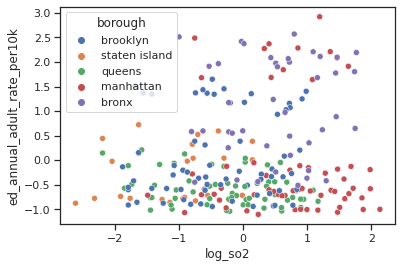

In [46]:
sns.scatterplot(data=airq_std_log, x="log_so2", y="ed_annual_adult_rate_per10k", hue ='borough')

Scatter plot does not show any significant correlation between log_so2 and number of ed visits

#### Log-Level model with nitrogen

In [47]:
log_level_model3 = smf.ols(formula='ed_annual_adult_rate_per10k ~ log_no', data=airq_std_log).fit()
log_level_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     ed_annual_adult_rate_per10k   R-squared:                       0.005
Model:                                     OLS   Adj. R-squared:                  0.002
Method:                          Least Squares   F-statistic:                     1.381
Date:                         Sun, 25 Jul 2021   Prob (F-statistic):              0.241
Time:                                 17:07:48   Log-Likelihood:                -356.38
No. Observations:                          252   AIC:                             716.8
Df Residuals:                              250   BIC:                             723.8
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.05e-16      0.063   1.67e-15      1.000      -0.124       0.124
log_no         0.0741      0.063      1.175      0.241      -0.050       0.198
==============================================================================
Omnibus:                       35.887   Durbin-Watson:                   0.178
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.515
Skew:                           1.075   Prob(JB):                     2.92e-11
Kurtosis:                       2.996   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
## add borough to the model
log_level_model5 = smf.ols(formula='ed_annual_adult_rate_per10k ~ log_no + borough', data=airq_std_log).fit()
log_level_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     ed_annual_adult_rate_per10k   R-squared:                       0.278
Model:                                     OLS   Adj. R-squared:                  0.263
Method:                          Least Squares   F-statistic:                     18.93
Date:                         Sun, 25 Jul 2021   Prob (F-statistic):           6.48e-16
Time:                                 17:07:49   Log-Likelihood:                -316.06
No. Observations:                          252   AIC:                             644.1
Df Residuals:                              246   BIC:                             665.3
Df Model:                                    5                                         
Covariance Type:                     nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    1.0623      0.133      8.009      0.000       0.801       1.324
borough[T.brooklyn]         -1.0314      0.169     -6.087      0.000      -1.365      -0.698
borough[T.manhattan]        -1.1815      0.206     -5.729      0.000      -1.588      -0.775
borough[T.queens]           -1.6310      0.176     -9.247      0.000      -1.978      -1.284
borough[T.staten island]    -1.2863      0.249     -5.176      0.000      -1.776      -0.797
log_no                       0.0264      0.087      0.304      0.761      -0.144       0.197
==============================================================================
Omnibus:                       35.451   Durbin-Watson:                   0.219
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.838
Skew:                           0.983   Prob(JB):                     1.11e-10
Kurtosis:                       3.710   Cond. No.                         6.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
log_level_model6 = smf.ols(formula='ed_annual_adult_rate_per10k ~ log_so2 + borough', data=airq_std_log).fit()
log_level_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     ed_annual_adult_rate_per10k   R-squared:                       0.278
Model:                                     OLS   Adj. R-squared:                  0.263
Method:                          Least Squares   F-statistic:                     18.91
Date:                         Sun, 25 Jul 2021   Prob (F-statistic):           6.61e-16
Time:                                 17:07:49   Log-Likelihood:                -316.08
No. Observations:                          252   AIC:                             644.2
Df Residuals:                              246   BIC:                             665.3
Df Model:                                    5                                         
Covariance Type:                     nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    1.0523      0.137      7.688      0.000       0.783       1.322
borough[T.brooklyn]         -1.0183      0.179     -5.680      0.000      -1.371      -0.665
borough[T.manhattan]        -1.1503      0.173     -6.640      0.000      -1.492      -0.809
borough[T.queens]           -1.6300      0.180     -9.038      0.000      -1.985      -1.275
borough[T.staten island]    -1.2978      0.243     -5.335      0.000      -1.777      -0.819
log_so2                      0.0152      0.066      0.229      0.819      -0.115       0.145
==============================================================================
Omnibus:                       34.725   Durbin-Watson:                   0.220
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.585
Skew:                           0.972   Prob(JB):                     2.08e-10
Kurtosis:                       3.682   Cond. No.                         6.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
log_level_model7 = smf.ols(formula='ed_annual_adult_rate_per10k ~ log_so2 + log_no + borough', data=airq_std_log).fit()
log_level_model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     ed_annual_adult_rate_per10k   R-squared:                       0.278
Model:                                     OLS   Adj. R-squared:                  0.260
Method:                          Least Squares   F-statistic:                     15.71
Date:                         Sun, 25 Jul 2021   Prob (F-statistic):           2.99e-15
Time:                                 17:07:49   Log-Likelihood:                -316.06
No. Observations:                          252   AIC:                             646.1
Df Residuals:                              245   BIC:                             670.8
Df Model:                                    6                                         
Covariance Type:                     nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    1.0586      0.140      7.547      0.000       0.782       1.335
borough[T.brooklyn]         -1.0258      0.183     -5.605      0.000      -1.386      -0.665
borough[T.manhattan]        -1.1771      0.214     -5.512      0.000      -1.598      -0.756
borough[T.queens]           -1.6278      0.181     -8.994      0.000      -1.984      -1.271
borough[T.staten island]    -1.2822      0.254     -5.044      0.000      -1.783      -0.782
log_so2                      0.0063      0.078      0.081      0.935      -0.147       0.160
log_no                       0.0220      0.102      0.215      0.830      -0.179       0.223
==============================================================================
Omnibus:                       35.372   Durbin-Watson:                   0.219
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.700
Skew:                           0.981   Prob(JB):                     1.19e-10
Kurtosis:                       3.707   Cond. No.                         8.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
log_level_model8 = smf.ols(formula='ed_annual_adult_rate_per10k ~ log_ozone + borough', data=airq_std_log).fit()
log_level_model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     ed_annual_adult_rate_per10k   R-squared:                       0.286
Model:                                     OLS   Adj. R-squared:                  0.272
Method:                          Least Squares   F-statistic:                     19.71
Date:                         Sun, 25 Jul 2021   Prob (F-statistic):           1.66e-16
Time:                                 17:07:49   Log-Likelihood:                -314.62
No. Observations:                          252   AIC:                             641.2
Df Residuals:                              246   BIC:                             662.4
Df Model:                                    5                                         
Covariance Type:                     nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    1.0388      0.132      7.853      0.000       0.778       1.299
borough[T.brooklyn]         -1.0400      0.169     -6.170      0.000      -1.372      -0.708
borough[T.manhattan]        -1.0107      0.189     -5.338      0.000      -1.384      -0.638
borough[T.queens]           -1.6743      0.173     -9.692      0.000      -2.015      -1.334
borough[T.staten island]    -1.3352      0.219     -6.110      0.000      -1.766      -0.905
log_ozone                    0.1130      0.066      1.710      0.088      -0.017       0.243
==============================================================================
Omnibus:                       32.263   Durbin-Watson:                   0.239
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.489
Skew:                           0.930   Prob(JB):                     1.61e-09
Kurtosis:                       3.628   Cond. No.                         6.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
log_level_model10 = smf.ols(formula='ed_annual_adult_rate_per10k ~ log_ozone*log_no + log_ozone + log_no + log_so2 + borough', data=airq_std_log).fit()
log_level_model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     ed_annual_adult_rate_per10k   R-squared:                       0.305
Model:                                     OLS   Adj. R-squared:                  0.283
Method:                          Least Squares   F-statistic:                     13.36
Date:                         Sun, 25 Jul 2021   Prob (F-statistic):           5.55e-16
Time:                                 17:07:49   Log-Likelihood:                -311.15
No. Observations:                          252   AIC:                             640.3
Df Residuals:                              243   BIC:                             672.1
Df Model:                                    8                                         
Covariance Type:                     nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    1.0760      0.139      7.733      0.000       0.802       1.350
borough[T.brooklyn]         -1.0497      0.181     -5.809      0.000      -1.406      -0.694
borough[T.manhattan]        -1.0611      0.216     -4.908      0.000      -1.487      -0.635
borough[T.queens]           -1.5999      0.179     -8.945      0.000      -1.952      -1.248
borough[T.staten island]    -1.1076      0.261     -4.243      0.000      -1.622      -0.593
log_ozone                    0.1321      0.091      1.452      0.148      -0.047       0.311
log_no                       0.1613      0.126      1.285      0.200      -0.086       0.409
log_ozone:log_no             0.0869      0.045      1.944      0.053      -0.001       0.175
log_so2                     -0.0166      0.077     -0.215      0.830      -0.169       0.136
==============================================================================
Omnibus:                       33.019   Durbin-Watson:                   0.286
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.797
Skew:                           0.934   Prob(JB):                     8.39e-10
Kurtosis:                       3.701   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### log-log model with nitrogen

In [53]:
log_log_model2 = smf.ols(formula='log_asthma ~ log_no', data=airq_std_log).fit()
log_log_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_asthma   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                   0.01529
Date:                Sun, 25 Jul 2021   Prob (F-statistic):              0.902
Time:                        17:07:49   Log-Likelihood:                -357.06
No. Observations:                 252   AIC:                             718.1
Df Residuals:                     250   BIC:                             725.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.116e-16      0.063   3.35e-15      1.000      -0.124       0.124
log_no        -0.0078      0.063     -0.124      0.902      -0.132       0.117
==============================================================================
Omnibus:                       21.516   Durbin-Watson:                   0.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.538
Skew:                           0.068   Prob(JB):                       0.0231
Kurtosis:                       2.164   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Log_level model with ozone

In [54]:
log_level_model4 = smf.ols(formula='ed_annual_adult_rate_per10k ~ log_ozone', data=airq_std_log).fit()
log_level_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     ed_annual_adult_rate_per10k   R-squared:                       0.003
Model:                                     OLS   Adj. R-squared:                 -0.001
Method:                          Least Squares   F-statistic:                    0.8418
Date:                         Sun, 25 Jul 2021   Prob (F-statistic):              0.360
Time:                                 17:07:50   Log-Likelihood:                -356.65
No. Observations:                          252   AIC:                             717.3
Df Residuals:                              250   BIC:                             724.4
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.05e-16      0.063   1.67e-15      1.000      -0.124       0.124
log_ozone      0.0579      0.063      0.917      0.360      -0.066       0.182
==============================================================================
Omnibus:                       40.638   Durbin-Watson:                   0.179
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.754
Skew:                           1.159   Prob(JB):                     4.74e-13
Kurtosis:                       3.179   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Checking for Outliers

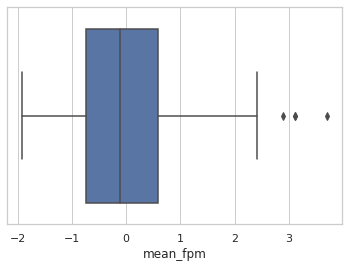

In [55]:
import seaborn as sns
sns.set_theme(style="whitegrid")

ax = sns.boxplot(x=airq_std["mean_fpm"])

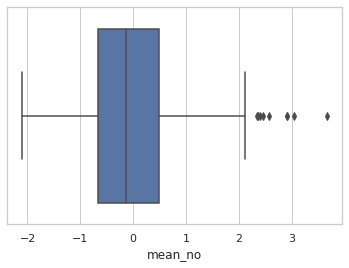

In [56]:
ax2 = sns.boxplot(x=airq_std["mean_no"])

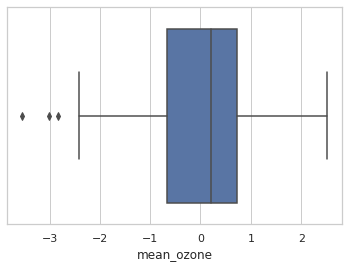

In [57]:
ax3 = sns.boxplot(x=airq_std["mean_ozone"])

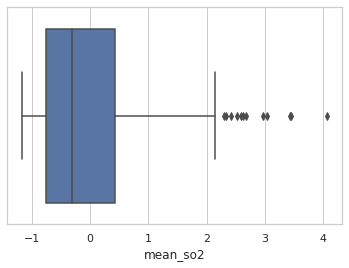

In [58]:
ax4 = sns.boxplot(x=airq_std["mean_so2"])

In [59]:
Q1 = airq_std.quantile(0.25)
Q3 = airq_std.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

year                           3.000000
mean_fpm                       1.324057
mean_no                        1.147602
mean_ozone                     1.405877
mean_so2                       1.182212
ed_annual_adult_rate_per10k    1.182346
dtype: float64


In [60]:
q1_meanfpm = airq_std['mean_fpm'].quantile(0.25)

In [61]:
q1_meanfpm

-0.7340488111514119

In [62]:
q3_meanfpm = airq_std['mean_fpm'].quantile(0.75)
q1_meanno = airq_std['mean_no'].quantile(0.25)
q3_meanno = airq_std['mean_no'].quantile(0.75)
q1_meanozone = airq_std['mean_ozone'].quantile(0.25)
q3_meanozone = airq_std['mean_ozone'].quantile(0.75)
q1_meanso2 = airq_std['mean_so2'].quantile(0.25)
q3_meanso2 = airq_std['mean_so2'].quantile(0.75)

In [63]:
#create df with no outliers
airq_std_no_outlier = airq_std.drop(airq_std[((airq_std['mean_fpm'] < q1_meanfpm-1.5*1.324057) | (airq_std['mean_fpm']> q3_meanfpm+1.5*1.324057))|
                                            ((airq_std['mean_no'] < q1_meanno-1.5*1.147602) | (airq_std['mean_no']> q3_meanno+1.5*1.147602))|
                                            ((airq_std['mean_ozone'] < q1_meanozone-1.5*1.405877) | (airq_std['mean_ozone']> q3_meanozone+1.5*1.405877))|
                                            ((airq_std['mean_so2'] < q1_meanso2-1.5*1.182212) | (airq_std['mean_so2']> q3_meanso2+1.5*1.182212))].index)

In [64]:
airq_std.shape

(252, 8)

In [65]:
airq_std_no_outlier.shape

(233, 8)

## tests with data with no outliers

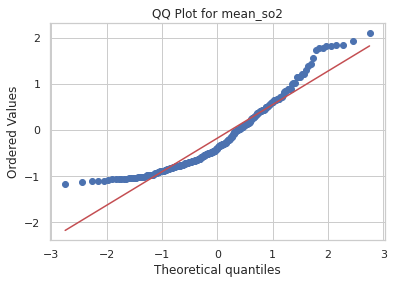

In [66]:
stats.probplot(x=airq_std_no_outlier['mean_so2'], dist="norm", plot=plt)
plt.title("QQ Plot for mean_so2")
plt.show()

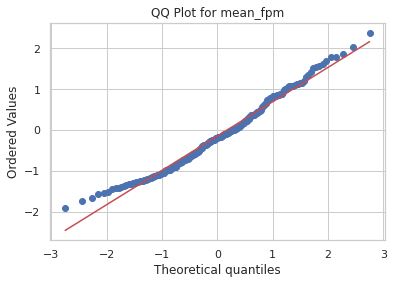

In [67]:
stats.probplot(x=airq_std_no_outlier['mean_fpm'], dist="norm", plot=plt)
plt.title("QQ Plot for mean_fpm")
plt.show()

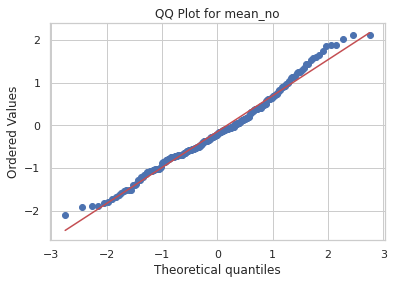

In [68]:
stats.probplot(x=airq_std_no_outlier['mean_no'], dist="norm", plot=plt)
plt.title("QQ Plot for mean_no")
plt.show()

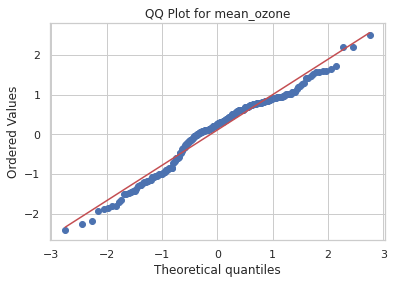

In [69]:
stats.probplot(x=airq_std_no_outlier['mean_ozone'], dist="norm", plot=plt)
plt.title("QQ Plot for mean_ozone")
plt.show()